## Programming Exercise 2: Logistic Regression
#### Author - Rishabh Jain

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
%matplotlib inline

### 1&nbsp;&nbsp;&nbsp;&nbsp;Logistic Regression
In this part of the exercise, we will build a logistic regression model to predict whether the student gets admitted into a university.  

Suppose that we are the adminstrator of a department and want to determine each applicant's chance of admission based on their results in two exams. We have hisotrical data from previous applicants that we can use as a training set for logistic regression. For each applicant, we have their scores in two exams and their admission decision.

Our task is to build a classification model that estimates an applicant's probability of admission based on the score from those two exams.

In [35]:
data=pd.read_csv('./ex2data1.csv')
print(f'TRAINING DATASET SHAPE : {data.shape[0]} X {data.shape[1]}')
data.head()

TRAINING DATASET SHAPE : 100 X 3


,exam1,exam2,decision
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


#### 1.1&nbsp;&nbsp;&nbsp;&nbsp;Visualizing the data
Before starting to implement any learning algorithms, it is always good to visualize the data if possible.

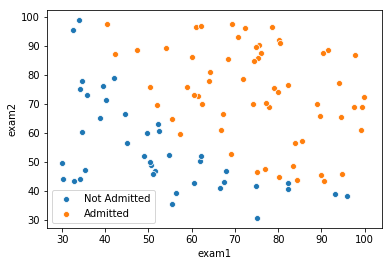

In [36]:
sns.scatterplot(x='exam1',y='exam2',data=data[data['decision']==0],label='Not Admitted');
sns.scatterplot(x='exam1',y='exam2',data=data[data['decision']==1],label='Admitted');

#### 1.2&nbsp;&nbsp;&nbsp;&nbsp;Implementation
We will add another dimension to the Design Matrix to accomodate the $\theta_0$ intercept term. We will also initialize the fitting parameters to 0.

In [46]:
m=data.shape[0]
X=np.ones(shape=(m,3))
X[:,1:]=data.values[:,:2]
X.shape

(100, 3)

In [49]:
y=data.values[:,2]
y=y[:,np.newaxis]
y.shape

(100, 1)

In [62]:
alpha=0.1
iterations=1500
theta=np.zeros(shape=(1,3))
theta.shape

(1, 3)

##### 1.2.1&nbsp;&nbsp;&nbsp;&nbsp;Sigmoid/Logistic Function

Before starting with the implementation, let's try to understand the sigmoid function.  
For large positive values of $x$, sigmoid function is close to 1, while for large negative values, sigmoid function is close to 0. And sigmoid of 0 is exactly 0.5 .

$$ \sigma(x)=\frac{1}{1+e^{-x}} $$

In [37]:
def sigmoid(z):
    sigma=1/(1+np.exp(-z))
    return sigma

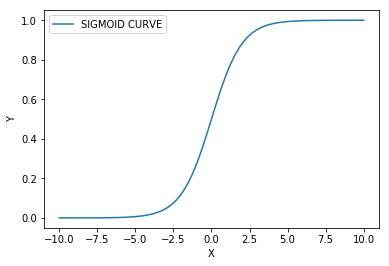

In [38]:
df=pd.DataFrame({'X':np.linspace(-10,10,100)})
df['Y']=sigmoid(df['X'])
sns.lineplot(x='X',y='Y',data=df,label='SIGMOID CURVE');

###### Model Representation

The hypothesis in Linear Regression (i.e. $h_\theta(x)=\theta^Tx$) cannot be used for the classification problems because the linear hypothesis output ranges from $-\infty$ to $\infty$, whereas $y$ (i.e. target variable) in classification problems are either 0 or 1. Hence the range of hypothesis output in Logistic Regression should be:

$$ 0\le h_\theta(x) \le 1 $$

In order to keep $h_\theta(x)$ in the range mentioned above, Sigmoid Function comes to rescue:

$$ h_\theta(x)=g(\theta^Tx) $$
$$ g(z)=\frac{1}{1+e^{-z}} $$



In [39]:
def predict(X,theta):
    '''Predicts by applying logistic function on linear model'''
    z=np.dot(X,theta.T)
    h=sigmoid(z)
    return h

##### 1.2.2&nbsp;&nbsp;&nbsp;&nbsp;Cost function
We learnt about the cost function $J(\theta)$ in **Linear Regression**, the cost function represents the optimization objective i.e. we create a cost function and minimize it to develope an accurate model with minimum error.
$$ J(\theta)=\frac{1}{2m}\sum_{i=0}^m(h_\theta(x^{(i)})-y^{(i)})^2 $$  
On replacing $h_\theta(x)$ with $\frac{1}{1+e^{(-\theta^Tx)}}$ in the above equation,it becomes '**Non Convex**' which does not guarrante to converge and find the global minimum. So we need a new cost function for Logistic Regression.  

<img src='https://d3ansictanv2wj.cloudfront.net/convex-non-convex-9c8cb9320d4b0392c5f67004e8832e85.jpg' width='500'>

The figure in left is a '**Convex**' function and has only one minimum called global minimum and will always converage whereas the figure in right is a '**Non Convex**' function and has mutiple minimums also called local minimums. And there is no guarrante that the non convex function will always converge.

For **Logistic Regression** cost function is defined as:  
$$ Cost(h_\theta(x),y)=\left\{\begin{array}{1}-log(h_\theta(x))\;\;\;\;\;\;\;\;\;if\;y=1\\-log(1-h_\theta(x))\;\;\;if\;y=0\end{array}\right. $$

Lets try to understand the cost function.  

For $y=1$
- $J(\theta)\approx\infty$ if $h_\theta(x)\approx0$ (Penalty for wrong prediction)
- $J(\theta)\approx0$ if $h_\theta(x)\approx1$  

For $y=0$
- $J(\theta)\approx\infty$ if $h_\theta(x)\approx1$ (Penalty for wrong prediction)
- $J(\theta)\approx0$ if $h_\theta(x)\approx0$  

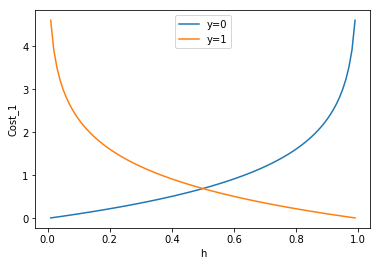

In [40]:
# In Logistic Regression, 0<h(x)<1 
df=pd.DataFrame({'h':np.linspace(0.01,0.99,100)})
df['Cost_1']=-np.log(df['h'])
df['Cost_0']=-np.log(1-df['h'])
sns.lineplot(x='h',y='Cost_0',data=df,label='y=0');
sns.lineplot(x='h',y='Cost_1',data=df,label='y=1');

From the above graph and the set of equations, we can see that this new cost function captures the intuition of penalizing the learning algorithm by a very large cost if predictions are not even remotely close. Combinig both the equations, **Cost function of Logistic Regression** also called **Cross Entropy function** looks like this:

$$ J(\theta)= \frac{-1}{m}\sum_{i=0}^m[y^{(i)}log(h_\theta(x^{(i)}))+(1-y^{(i)})log(1-h_\theta(x^{(i)})]$$

In [33]:
def computeCost(h,y):
    '''Computes the cost using Cross Entropy function'''
    m=y.shape[0]
    J=(-1/m)*np.sum(np.multiply(y,np.log(h))+np.multiply(1-y,np.log(1-h)))
    return J

In [51]:
h=predict(X,theta)
computeCost(h,y)

0.6931471805599453

##### 1.2.3&nbsp;&nbsp;&nbsp;&nbsp;Learning Parameters

**Gradient Descent Optimization** :
$$ \theta_j := \theta_j - \alpha \frac{\partial}{\partial \theta_j}J(\theta) $$

Lets calculate the $\frac{\partial}{\partial \theta_j}J(\theta)$ for Logistic Regression cost function.  

$ log(h_\theta(x))=log(\frac{1}{1+e^{-\theta^Tx}})=-log(1+e^{-\theta^Tx})\;\;\;\;\; (1) $  
$ log(1-h_\theta(x))=log(1-\frac{1}{1+e^{-\theta^Tx}})=log(\frac{e^{-\theta^Tx}}{1+e^{-\theta^Tx}})=log(e^{-\theta^Tx})-log(\frac{1}{1+e^{-\theta^Tx}})=-\theta^Tx-log(1+e^{-\theta^Tx})\;\;\;\;\; (2) $

Replacing $(1)$ and $(2)$ in $J(\theta)$,

$ J(\theta)=\frac{-1}{m}\sum_{i=0}^m[-y^i(log(1+e^{(-\theta^Tx^i)}))+(1-y^i)(-\theta^Tx^i-log(1+e^{-\theta^Tx^i}))] $

$ \;\;\;\;\;\;\;=\frac{-1}{m}\sum_{i=0}^m[-y^ilog(1+e^{-\theta^Tx^i})-\theta^Tx^i-log(1+e^{-\theta^Tx^i})+y^i\theta^Tx^i+y^ilog(1+e^{-\theta^Tx^i})] $

$ \;\;\;\;\;\;\;=\frac{-1}{m}\sum_{i=0}^m[y^i\theta^Tx^i-(log(e^{\theta^Tx^i})+log(1+e^{-\theta^Tx^i}))]\;\;\;\;\;(using\; m=log(e^m)) $

$ \;\;\;\;\;\;\;=\frac{-1}{m}\sum_{i=0}^m[y^i\theta^Tx^i-log(1+e^{\theta^Tx^i})]\;\;\;\;\;(using\; log(m)+log(n)=log(mn)) $

$ \frac{\partial}{\partial \theta}(J(\theta))=\frac{-1}{m}\sum_{i=0}^m[\frac{\partial}{\partial \theta}(y^i\theta^Tx^i)-\frac{\partial}{\partial \theta}(log(1+e^{\theta^Tx^i}))] $

$ \;\;\;\;\;\;\;\;\;\;\;\;=\frac{-1}{m}\sum_{i=0}^m[y^ix^i-\frac{1.e^{\theta^Tx^i}.x^i}{1+e^{\theta^Tx^i}}]\;\;\;\;\;(using\;\frac{d}{dx}(uv)=u.\frac{dv}{dx}+v.\frac{du}{dx}) $

$ \;\;\;\;\;\;\;\;\;\;\;\;=\frac{-1}{m}\sum_{i=0}^m[y^ix^i-\frac{x^i}{\frac{1+e^{\theta^Tx^i}}{e^{\theta^Tx^i}}}] $

$ \;\;\;\;\;\;\;\;\;\;\;\;=\frac{-1}{m}\sum_{i=0}^m[y^ix^i-\frac{x^i}{1+e^{-\theta^Tx^i}}] $

$ \;\;\;\;\;\;\;\;\;\;\;\;=\frac{1}{m}\sum_{i=0}^m(h_\theta(x^i)-y^i)x^i\;\;\;\;\; (3) $

Replacing $(3)$ in update rule:

$$ \theta_j:=\theta_j-\alpha\frac{1}{m}\sum_{i=0}^m(h_\theta(x^{(i)})-y^{(i)})x_j^{(i)} $$

As we can see that the Gradient Descent update rule remains same even though the underlying cost function has changed.